<div style="background-color: green;text-align:center;padding: 20px;font-size: 16px;color:white;">
Diabetes Prediction Using K-Means
</div>
<div style="background-color: #303030;text-align:right;padding: 10px;font-size: 16px;color:white;">

</div>

Diabetes is a common chronic disease and poses a great threat to human health. The characteristic of diabetes is that the blood glucose is higher than the normal level, which is caused by defective insulin secretion or its impaired biological effects, or both. Diabetes can lead to chronic damage and dysfunction of various tissues, especially eyes, kidneys, heart, blood vessels and nerves. Diabetes can be divided into two categories, type 1 diabetes (T1D) and type 2 diabetes (T2D). Patients with type 1 diabetes are normally younger, mostly less than 30 years old. The typical clinical symptoms are increased thirst and frequent urination, high blood glucose levels. This type of diabetes cannot be cured effectively with oral medications alone and the patients are required insulin therapy. Type 2 diabetes occurs more commonly in middle-aged and elderly people, which is often associated with the occurrence of obesity, hypertension, dyslipidemia, arteriosclerosis, and other diseases.


<div style="background-color:blue;text-align:center;padding: 20px;font-size: 16px;color:white;">
KMEANS CLUSTERING
</div>

Cluster is defined as groups of data points such that data points in a group will be similar or related to one another and different from the data points of another group. And the process is known as clustering. The goal of clustering is to determine the intrinsic grouping in a set of unlabelled data. Clustering is a form of unsupervised learning since it doesn’t require labeled data.

K- means is an unsupervised partitional clustering algorithm that is based on grouping data into k – numbers of clusters by determining centroid using the Euclidean or Manhattan method for distance calculation. It groups the object based on minimum distance.

<img src="https://aihubprojects.com/wp-content/uploads/2020/10/euclidean-distance-formula.png">
                                                                                             

# ALGORITHM

    1. First,  initialize the number of clusters, K (Elbow method is generally used in selecting the number of clusters )
    2. Randomly select the k data points for centroid. A centroid is the imaginary or real location representing the center of the cluster.
    3. Categorize each data items to its closest centroid and update the centroid coordinates calculating the average of items coordinates categorized in that group so far
    4. Repeat the process for a number of iterations till successive iterations clusters data items into the same group

# HOW IT WORKS ?

In the beginning, the algorithm chooses k centroids in the dataset randomly after shuffling the data. Then it calculates the distance of each point to each centroid using the euclidean distance calculation method. Each centroid assigned represents a cluster and the points are assigned to the closest cluster. At the end of the first iteration, the centroid values are recalculated, usually taking the arithmetic mean of all points in the cluster.  In every iteration, new centroid values are calculated until successive iterations provide the same centroid value. 

<div style="background-color:black;text-align:center;padding: 20px;font-size: 16px;color:white;">
LET's DIVE INTO CODE
</div>

The early diagnosis of the diabetes disease is a very important for cure process, and that provides an ease process of treatment for both the patient and the doctor. At this point, statistical methods and data mining algorithms can provide significance chances for early diagnosis of diabetes mellitus (DM).

# IMPORTING REQUIRED LIBRARIES

In [1]:
#importing required libraries & dataset for the project
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import datasets

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# IMPORTING DATASET & VISUALIZATION

In [2]:
data = pd.read_csv("./data.csv")   #importing files using pandas
data.head(10)    #shows top 10 dataset items

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Dataset dimensions - (rows, columns)
data.shape

(768, 9)

In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()        

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
print(data.groupby('Outcome').size())   #categorizes data based on Outcomes 

Outcome
0    500
1    268
dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

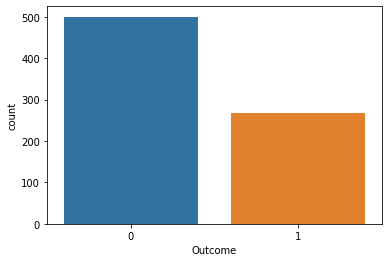

In [9]:
# Outcome countplot (visualizing in bar graph)
import seaborn as sns
sns.countplot(x = 'Outcome',data = data)

# Observations:

    1. There are a total of 768 records and 9 features in the dataset.
    2. Each feature can be either of integer or float dataype.
    3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
    4. There are zero NaN values in the dataset.
    5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.



<div style="background-color: blue;text-align:center;padding: 20px;font-size: 16px;color:white;">
DATA PRE-PROCESSING
</div>

In [10]:
#visualize columns
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
#  #converting categorical to numerical data (incase of categorical data)
#cat_cols=[ 'diabetes']
#le=preprocessing.LabelEncoder()
#data[cat_cols]=data[cat_cols].apply(le.fit_transform)

In [12]:
dataset_new = data

In [13]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

In [14]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

This estimator MinMaxScaler Scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [16]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [17]:
data1 = pd.DataFrame(dataset_scaled)
data1

,0,1,2,3,4,5,6,7,8
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333,1.0


<div style="background-color: red;text-align:center;padding: 20px;font-size: 16px;color:white;">
FEATURE IMPORTANCE
</div>

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

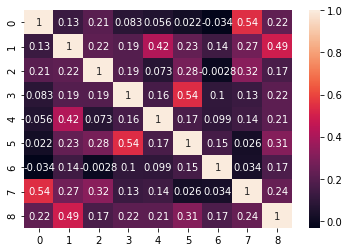

In [18]:
# Heatmap
sns.heatmap(data1.corr(), annot = True)
plt.show()

# Observations:

    1.The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
    2.From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age]. We can select these features to accept input from the user and predict the outcome.



<div style="background-color:orange;text-align:center;padding: 20px;font-size: 16px;color:black;">
VISUALIZING CLUSTERS
</div>

read more from here https://towardsdatascience.com/data-visualization-for-machine-learning-and-data-science-a45178970be7

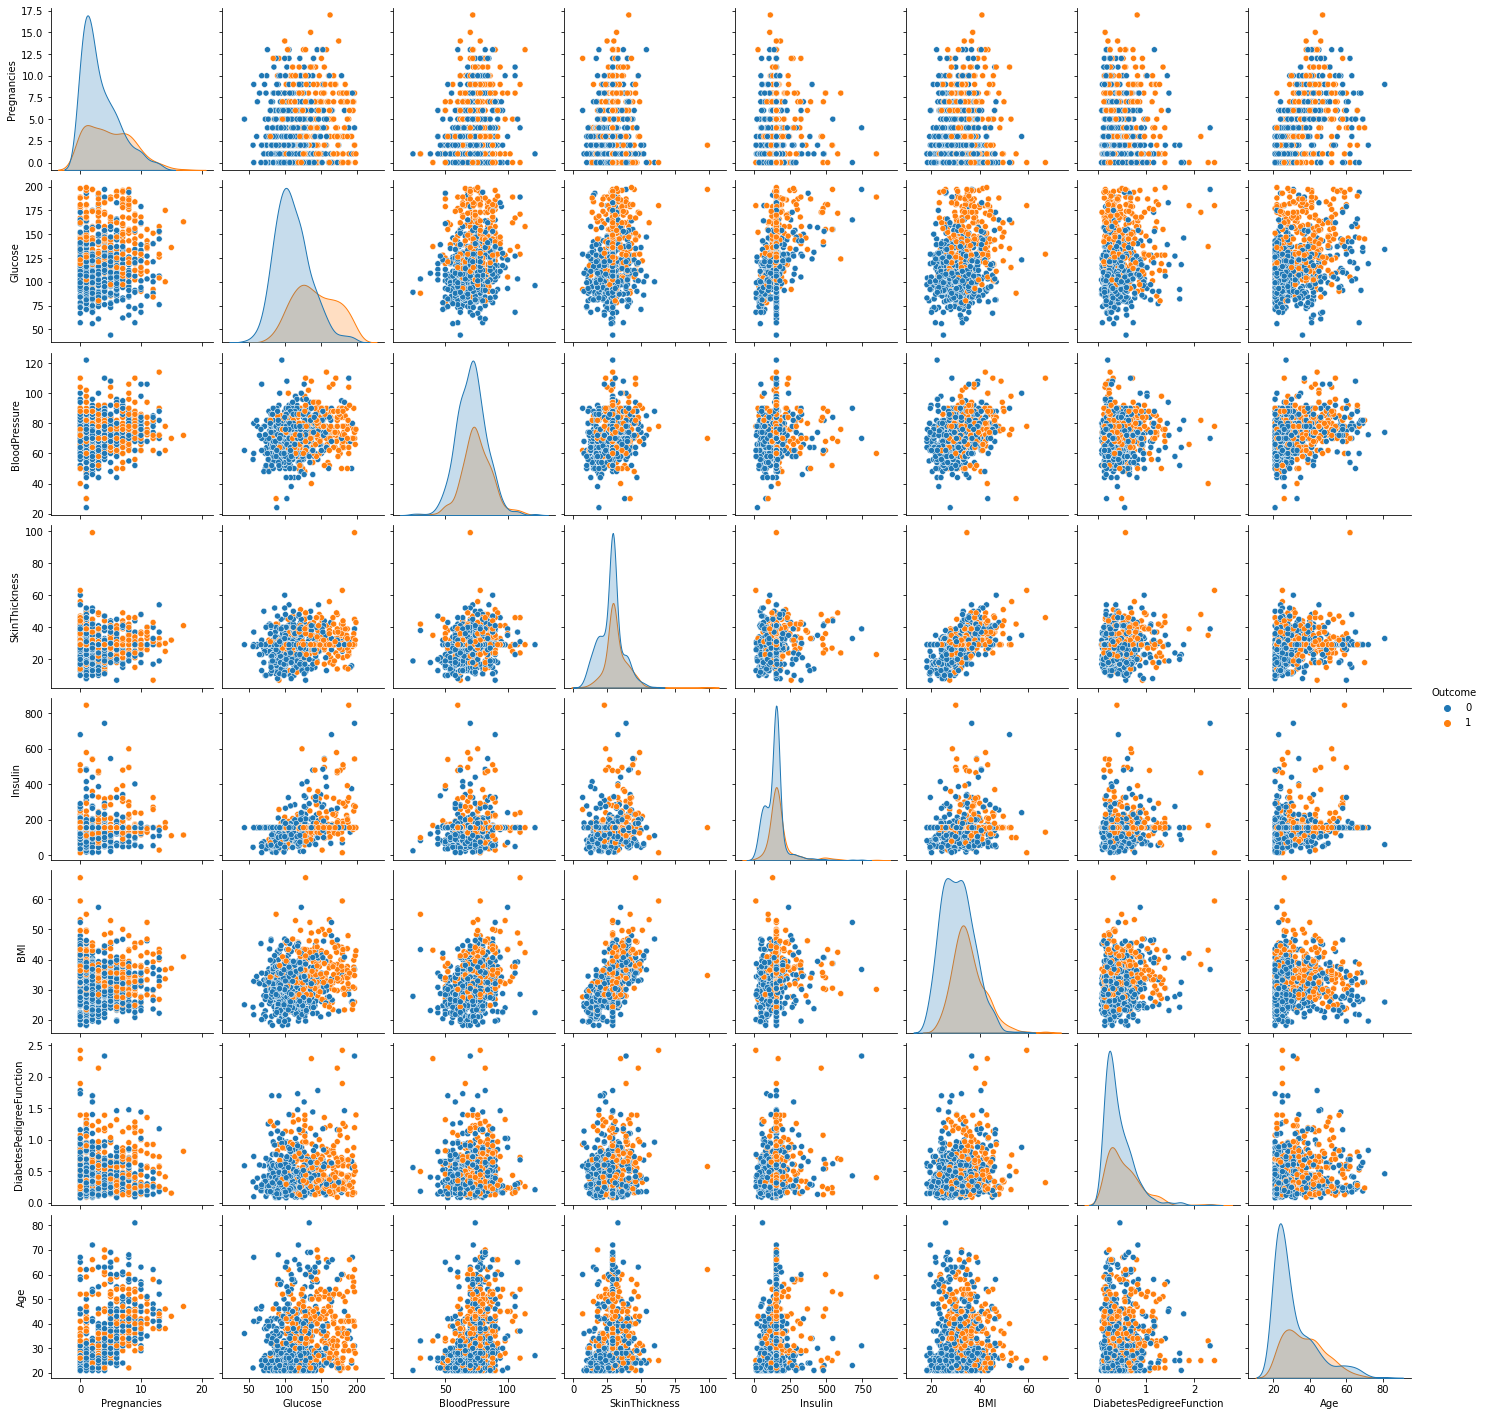

In [19]:
# Detailed distribution of the features in the dataset
sns.pairplot(data=data, hue='Outcome')
plt.show()

# FINDING BEST K BY ELBOW METHOD

While working with the k-means clustering scratch, one thing we must keep in mind is the number of clusters ‘k’. We should make sure that we are choosing the optimum number of clusters for the given data set.  But, here arises a question, how to choose the optimum value of k ?? We use the elbow method which is generally used in analyzing the optimum value of k.

The Elbow method is based on the principle that “Sum of squares of distances of every data point from its corresponding cluster centroid should be as minimum as possible”. 

## STEPS OF CHOOSING BEST K VALUE

    1. Run k-means clustering model on various values of k 
    2. For each value of K, calculate the Sum of squares of distances of every data point from its corresponding cluster centroid which is called WCSS ( Within-Cluster Sums of Squares)
    3. Plot the value of WCSS with respect to various values of K
    4. To select the value of k, we choose the value where there is bend (knee) on the plot i.e. WCSS isn’t increasing rapidly.

## Since we need to cluster diabetes & Non Diabetes, cluster = 2 for our problem Scenario

<div style="background-color: green;text-align:center;padding: 20px;font-size: 16px;color:white;">
FITTING THE MODEL (K=2)- KMEANS CLUSTERING
</div>

In [22]:
# Selecting features - [Glucose, Insulin, BMI]
X = data1.iloc[:, [1, 4, 5]].values
Y = data1.iloc[:, 8].values

In [23]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [24]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 3)
X_test shape: (154, 3)
Y_train shape: (614,)
Y_test shape: (154,)


In [25]:
import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X_train)

KMeans(n_clusters=2, random_state=0)

In [26]:
print(KMeans_Clustering.cluster_centers_)

[[0.38623354 0.13795979 0.25738404]
 [0.71332139 0.21774023 0.35405376]]


In [27]:
#prediction using kmeans and accuracy
kpred = KMeans_Clustering.predict(X_test)

print('Classification report:\n\n', sklearn.metrics.classification_report(Y_test,kpred))

Classification report:

               precision    recall  f1-score   support

         0.0       0.78      0.76      0.77       100
         1.0       0.57      0.59      0.58        54

    accuracy                           0.70       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.70      0.70       154



Confusion Matrix :


<AxesSubplot:>

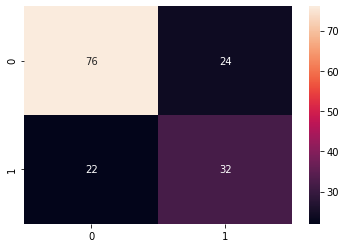

In [29]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix :")
outcome_labels = sorted(data.Outcome.unique())
sns.heatmap(
    confusion_matrix(Y_test, kpred),
    annot=True,
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

<div style="background-color: green;text-align:center;padding: 20px;font-size: 16px;color:white;">
PREDICTION ON NEW DATA
</div>

In [30]:
#print("all data must be entered in 0-1 range")
#G= input("enter Glucose level : ")
#B = input("enter BMI level : " )
#A= input("enter Age : ")
#out = KMeans_Clustering.predict([[G,B,A]])

out = KMeans_Clustering.predict([[0.53,0.54,0.5253]])
if (out==0):
    print("No Diabetes")
else:
    print("Diabetes")


Diabetes


<div style="background-color:red;text-align:center;padding: 20px;font-size: 16px;color:white;">
ACTUAL CLUSTER
</div>

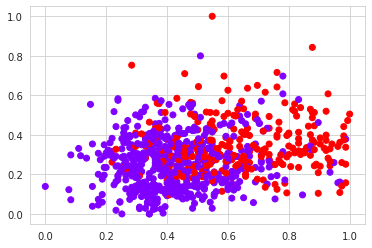

In [57]:
plt.scatter(data1.iloc[:, [1]].values,data1.iloc[:, [5]].values, c=data['Outcome'], cmap='rainbow')

<div style="background-color: yellow;text-align:center;padding: 20px;font-size: 16px;color:black;">
PREDICTED CLUSTER
</div>

In [55]:
import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X)

KMeans(n_clusters=2, random_state=0)

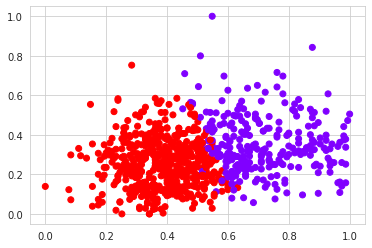

In [56]:
plt.scatter(data1.iloc[:, [1]].values,data1.iloc[:, [5]].values, c=KMeans_Clustering.labels_, cmap='rainbow')

<div style="background-color:blue;text-align:center;padding: 20px;font-size: 16px;color:white;">Thank You
</div>